In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from src import myfunctions
import statsmodels.api as sm
from scipy import signal
import scipy as sp
import warnings

warnings.filterwarnings('ignore')

Data sources:

- Electricity production by source - Our World in Data
https://ourworldindata.org/energy-mix

- CO2 emmissions by country - Our World in Data
https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

- Solar Photovoltaic potential by country - The World Bank
https://datacatalog.worldbank.org/search/dataset/0038379

In [2]:
# Read data from csv
df_el_prod=pd.read_csv("./input/electricity-prod-source.csv", encoding='ISO-8859-1')
df_co2=pd.read_csv("./input/co2-data.csv", encoding='ISO-8859-1')
df_solar=pd.read_csv("./input/Solar_radiation.csv", encoding='ISO-8859-1')

In [3]:
# Get clean series
df_series=myfunctions.cleanseries(df_el_prod,df_co2)

Text(0.5, 1.0, 'Development of largest poluters (Million Tons per year)')

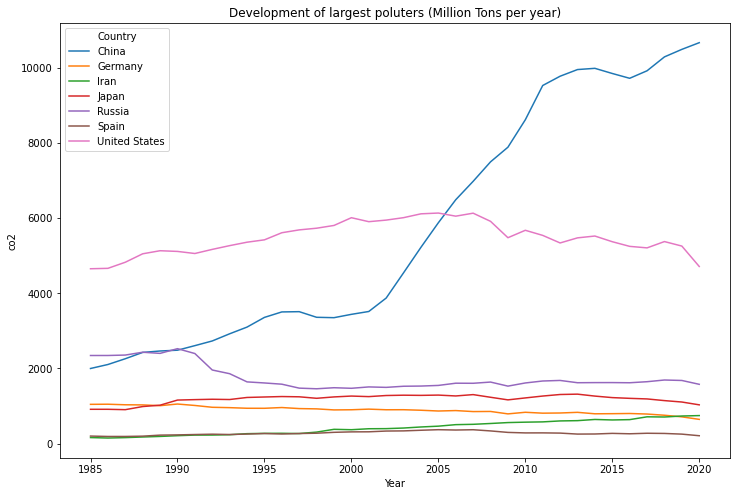

In [4]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df_series[df_series['Country'].isin(['China','United States','Russia','Japan','Iran','Spain','Germany'])],x='Year',y='co2', hue='Country')
plt.title('Development of largest poluters (Million Tons per year)')

Text(0.5, 1.0, 'CO2 polution tons per capita per year')

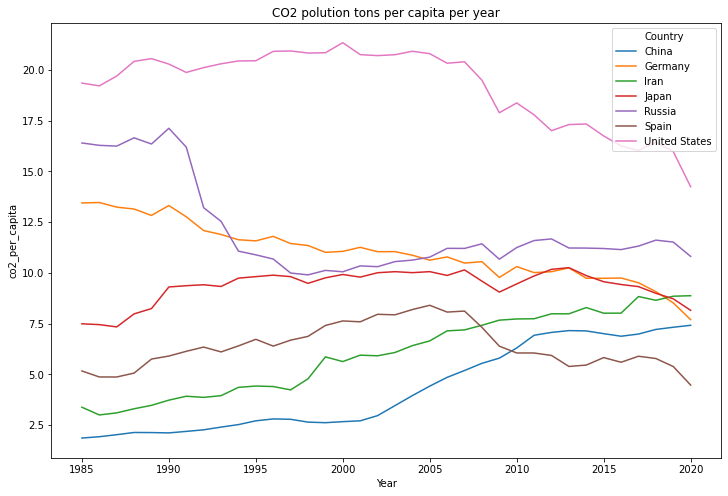

In [5]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df_series[df_series['Country'].isin(['China','United States','Russia','Japan','Iran','Spain','Germany'])],x='Year',y='co2_per_capita', hue='Country')
plt.title('CO2 polution tons per capita per year')

In [49]:
country=input('Please select a country to plot: ')

Please select a country to plot: Saudi Arabia


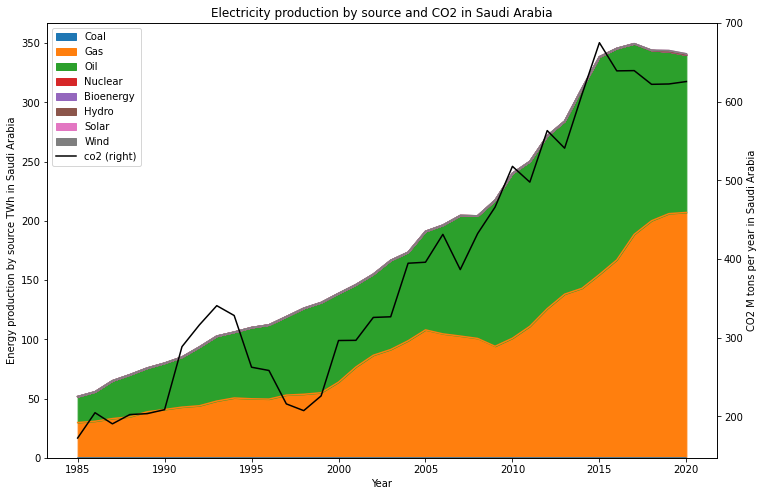

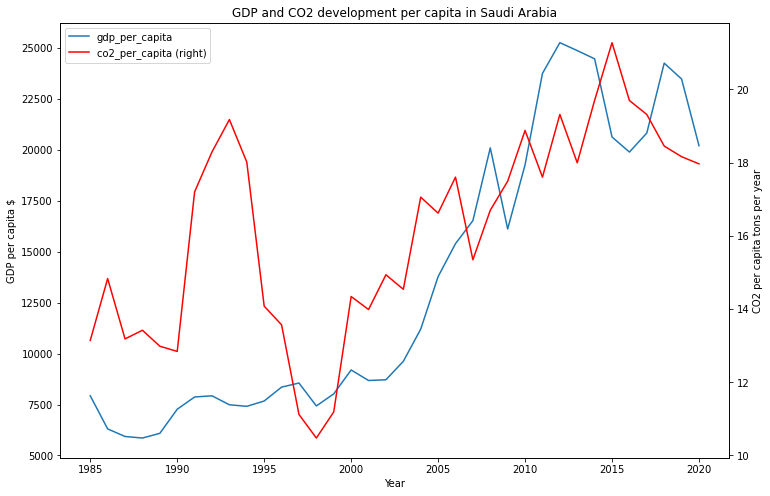

In [50]:
columns=['Coal','Gas','Oil','Nuclear','Bioenergy','Hydro','Solar','Wind']
ax=df_series.loc[df_series['Country']==country].plot(x='Year', y=columns, kind='area', stacked=True, figsize=(12,8))
ax.set_ylabel(f'Energy production by source TWh in {country}')
ax2=df_series.loc[df_series['Country']==country].plot(x='Year', y='co2' ,kind='line', color='k', secondary_y=True, figsize=(12,8), ax=ax)
ax2.set_ylabel(f'CO2 M tons per year in {country}')
plt.title(f'Electricity production by source and CO2 in {country}')
plt.show()

ax=df_series.loc[df_series['Country']==country].plot(x='Year', y='gdp_per_capita', kind='line', figsize=(12,8))
ax.set_ylabel('GDP per capita $')
ax2=df_series.loc[df_series['Country']==country].plot(x='Year', y='co2_per_capita' ,kind='line', color='r', secondary_y=True, figsize=(12,8), ax=ax)
ax2.set_ylabel('CO2 per capita tons per year')
plt.title(f'GDP and CO2 development per capita in {country}')
plt.show()

In [6]:
# Create the poluters dataframe
df_poluters=myfunctions.getstatic(df_series,df_solar,2019)

Text(0.5, 1.0, 'Monetary potential in $ from one square meter per year per country')

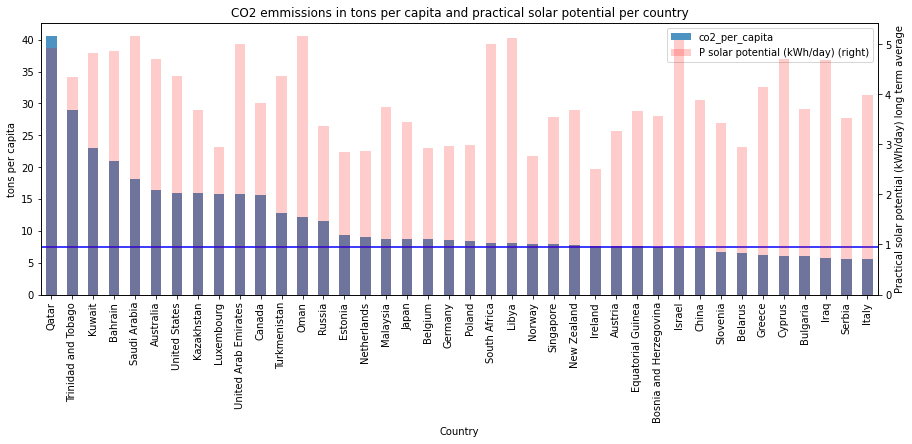

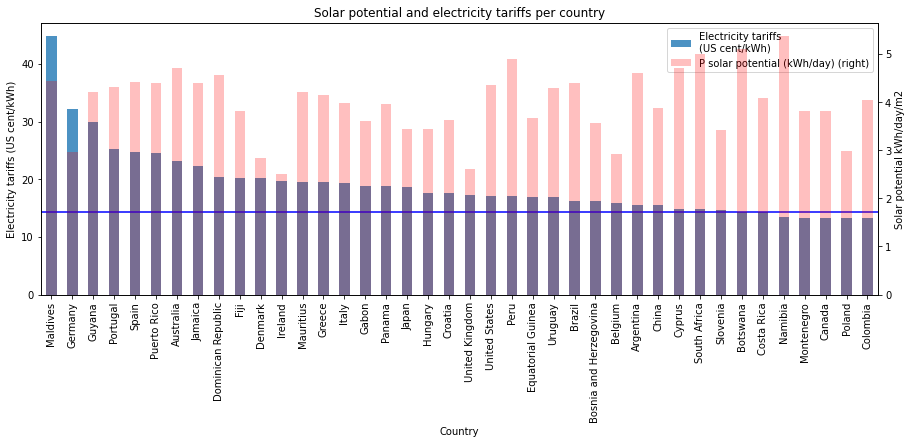

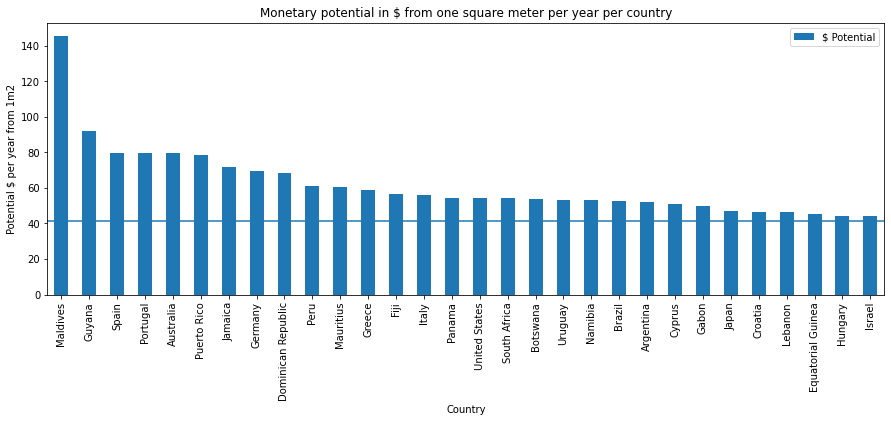

In [7]:
df_poluters.sort_values('co2_per_capita',ascending=False, inplace=True)
ax=df_poluters[:40].plot(x='Country', y='co2_per_capita', kind='bar', figsize=(15,5), alpha=0.8)
ax.set_ylabel('tons per capita')
ax2=df_poluters[:40].plot(x='Country', y='P solar potential (kWh/day)', kind='bar', alpha=0.2, color='r', secondary_y=True, figsize=(15,5), ax=ax)
ax2.set_ylabel('Practical solar potential (kWh/day) long term average')
ax.axhline(df_poluters['co2_per_capita'].mean(), color='b')
plt.title('CO2 emmissions in tons per capita and practical solar potential per country')


df_poluters.sort_values('Electricity tariffs\n(US cent/kWh)',ascending=False, inplace=True)
ax=df_poluters[:40].plot(x='Country', y='Electricity tariffs\n(US cent/kWh)', kind='bar', alpha=0.8, figsize=(15,5))
ax.set_ylabel('Electricity tariffs (US cent/kWh)')
ax2=df_poluters[:40].plot(x='Country', y='P solar potential (kWh/day)', kind='bar', color='r',secondary_y=True, figsize=(15,5), alpha=0.25,ax=ax)
ax2.set_ylabel('Solar potential kWh/day/m2')
ax.axhline(df_poluters['Electricity tariffs\n(US cent/kWh)'].mean(), color='b')
plt.title('Solar potential and electricity tariffs per country')
# ask Fer how to add a third Y axis

df_poluters['$ Potential']=0.2*df_poluters['P solar potential (kWh/day)']*df_poluters['Electricity tariffs\n(US cent/kWh)']*365/100
df_poluters.sort_values('$ Potential',ascending=False, inplace=True)
ax=df_poluters[:30].plot(x='Country', y='$ Potential', kind='bar', figsize=(15,5))
ax.set_ylabel('Potential $ per year from 1m2')
ax.axhline(df_poluters['$ Potential'].mean())
plt.title('Monetary potential in $ from one square meter per year per country')


### Web scraping

Now look in Wikipedia for solar manufacturers that you would contact with this proposition

In [2]:
import requests
from bs4 import BeautifulSoup as BS

In [3]:
url='https://en.wikipedia.org/wiki/List_of_photovoltaics_companies'

In [4]:
df_comp_full=myfunctions.scrape(url)
df_comp_full

,Company,Type,Industry,Founded,Website,Headquarters,Number of employees,Products,Founder,Founders,Key people,Parent,Traded as,Subsidiaries,Operating income,Net income,Total assets,Total equity
1,Yingli,Public,solar energy,1998,Yingli Green Energy site (in English),"Baoding, Hebei province, People's Republic of ...",14533,photovoltaic products,NaN,NaN,Liansheng Miao (Chairman and CEO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vikram Solar Pvt. Ltd,Limited company,Solar energy,2006,www.vikramsolar.com,"""The Chambers"", 8th Floor, 1865, Rajdanga Main...",NaN,Solar modules,Gyanesh Chaudhary,NaN,Gyanesh Chaudhary(MD)[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Suntech,Public,Photovoltaics,2001,www.suntech-power.com/,"Wuxi, Jiangsu, China",NaN,NaN,Shi Zhengrong,NaN,NaN,Shunfeng International Clean Energy Limited,NaN,NaN,-US$616 Million (FY 2011)[1],-US$1.00 Billion (FY 2011)[1],US$2.09 Billion (FY 2011) [2],US$946 Million (FY 2011)[2]
1,SunPower,Public,Renewable energy,1985,sunpower.com,"San Jose, California, U.S.",3660,NaN,Richard Swanson,NaN,Peter Faricy (President & CEO),NaN,Nasdaq: SPWRS&P 400 component,NaN,US$−27.5 million (2021),US$−37.4 million (2021),US$1.07 billion (2021),US$1.56 billion (2021)
1,SolarWorld,Aktiengesellschaft,Photovoltaics,1975,www.solarworld.com,"Bonn, Germany",3034,"Solar cells, wafers,PV modules and systems",NaN,NaN,"Frank H. Asbeck (founder and CEO), Georg Ganse...",NaN,FWB: SWV,SolarWorld Innovations GmbHSolarWorld Industri...,"€63,400 (2016)[2]",€87.3 million (2010)[3],"€686,943 (2016)[2]","€121,808 (2016)[2]"
1,SolarPark Korea,NaN,"Renewable Energy, Photovoltaics",2008,[1],"Wanju, South Korea",300,Photovoltaic modules,NaN,NaN,Hyunwoo Park (Chairman) Jongkook Lee(Vice Pres...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sharp,Public,Consumer electronics,1912,global.sharp sharpconsumer.com,"Sakai-ku Sakai, Osaka Prefecture, Japan",52876,"Televisions, audiovisual, home appliances, inf...",Tokuji Hayakawa[1],NaN,Tai Jeng-wu(Chairman and CEO)Katsuaki Nomura(P...,NaN,TYO: 6753Nikkei 225 Component,Dynabook Inc.,¥52.77 billion (2020)[2],¥20.96 billion (2020)[2],¥1.83 trillion (2020)[2],¥364.59 billion (2020)[2]
1,Panasonic,Public,Conglomerate,1918,holdings.panasonic (Corporate) panasonic.com (...,"Kadoma, Osaka, Japan.mw-parser-output .geo-def...",279385,Artificial intelligenceAutomationConstructionE...,Kōnosuke Matsushita,NaN,Kazuhiro Tsuga (Chairman)Yuki Kusumi (Presiden...,NaN,TYO: 6752NAG: 6752NYSE: MC (former)Nikkei 225 ...,Panasonic Corporationother select subsidiaries...,¥923.75 billion (2020)[* 1],¥200.71 billion (2020)[* 1],¥5.22 trillion (2020)[* 1],¥3.16 trillion (2020)[* 1]
1,Renewable Energy Corporation,Public,Solar energy,1996,www.recgroup.com,"20 Tuas South Avenue 14, Singapore[2]",4200,"Polysilicon, wafers, solar cells, solar modules",NaN,NaN,NaN,Reliance New Energy Solar,OSE: REC,NaN,NOK 1.018 billion (2010)[3],NOK 989 million (2010)[3],NOK 36.87 billion (end 2010)[3],NOK 22.15 billion (end 2010)[3]
1,Q-Cells,NaN,Photovoltaics,1999,q-cells.com,"Seoul, South Korea",8500,Photovoltaic cellsSolar modulesSolar systemsLa...,NaN,NaN,Hee Cheul Kim (CEO)Dong Kwan Kim (CCO)Jung Pyo...,Hanwha Solutions,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import openpyxl
df_comp_full.to_excel('./output/panel_manufacturers.xlsx')